In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import math
from pylab import rcParams
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import plotly.express as px
from plotly.subplots import make_subplots
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
path='/content/drive/MyDrive/P3 Fitrec Dataset/Generated datsets fresh/dataclean.dataset_2-10-23.csv/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%time
df = pd.read_csv('/content/drive/MyDrive/P3 Fitrec Dataset/Generated datsets fresh/dataclean.dataset_2-10-23.csv')
print(len(df))

66317
CPU times: user 30.7 s, sys: 4.46 s, total: 35.2 s
Wall time: 1min 20s


In [5]:
df.head(3)

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_distance,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed
0,396826535,10921915,male,bike,7589,1562.0,53.88,152.65,"[24.64977040886879, 24.65014273300767, 24.6509...","[60.173348765820265, 60.173239801079035, 60.17...",...,"[0.023920359645758085, 0.0513686868631109, 0.0...","[10.764161840591138, 16.81157024610902, 15.919...","[8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...",True,43.0712,820.6,74.2,14.6,59.6,25.568980
1,392337038,10921915,male,bike,4440,908.0,32.61,147.71,"[24.649855233728886, 24.65015547350049, 24.650...","[60.173247596248984, 60.17320962622762, 60.172...",...,"[0.01714931222251621, 0.047614484656155226, 0....","[12.34750480021167, 14.284345396846566, 17.330...","[5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...",True,35.7248,454.2,67.8,17.2,50.6,27.129599
2,386729739,10921915,male,bike,4519,921.0,32.70,147.02,"[24.649874344468117, 24.650242729112506, 24.65...","[60.173286236822605, 60.17323946580291, 60.173...",...,"[0.02104899112126496, 0.03733382239564792, 0.0...","[12.629394672758975, 16.800220078041566, 20.17...","[6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...",True,32.6104,481.4,64.0,12.4,51.6,26.651989


In [6]:
df['sport'].unique()

array(['bike', 'run', 'mountain bike', 'walk'], dtype=object)

# Cluster for Running

In [7]:
df_sub = df[df['sport']=='run'].copy()
df_sub.reset_index(drop=1,inplace=True)
df_sub

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_distance,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed
0,321063199,4969375,male,run,3888,436.0,8.650000,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,"[0.024692396657788666, 0.02062475820692565, 0....","[12.698946852577029, 10.911666227748753, 10.05...","[7, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, ...",True,-31.706000,762.000000,41.2000,-360.80000,402.00000,8.255823
1,303565793,4969375,male,run,4204,577.0,14.370000,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,"[0.012866693107454877, 0.018551828170520174, 0...","[5.790011898354694, 7.923126352508781, 8.85172...","[8, 8, 9, 8, 9, 8, 9, 8, 8, 9, 8, 9, 8, 9, 8, ...",True,41.671200,205.800000,57.8000,23.20000,34.60000,12.202044
2,296982347,4969375,male,run,6503,1025.0,22.220000,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,"[0.0258024349522409, 0.034169705873918786, 0.0...","[7.1452896790820954, 9.460093775795364, 10.251...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...",True,34.125600,248.000000,44.8000,24.60000,20.20000,12.104143
3,295890426,4969375,male,run,5118,775.0,16.980000,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,"[0.03005678592559137, 0.029397223648873875, 0....","[10.820442933212894, 10.685701145251175, 10.36...","[10, 10, 10, 11, 10, 10, 10, 11, 10, 10, 10, 1...",True,45.097200,191.800000,67.0000,27.00000,40.00000,11.824599
4,294163731,4969375,male,run,3035,445.0,9.670000,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,"[0.008947091230656174, 0.009208079362029106, 0...","[5.368254738393704, 6.557825426283524, 7.28499...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, ...",True,48.845600,252.000000,71.2000,0.40000,70.80000,11.395391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,298971490,69,male,run,2047,623.0,6.013510,155.294,"[11.76463108509779, 11.76454659551382, 11.7644...","[55.24085112847388, 55.24080477654934, 55.2407...",...,"[0.0074356460011203145, 0.01056021379557203, 0...","[6.692081401008283, 9.190715975634406, 9.97964...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, ...",True,21.016800,213.800000,38.6000,13.40000,25.20000,10.481452
36996,235763396,69,male,run,7387,1374.0,21.310540,134.108,"[11.757076978683472, 11.757056526839733, 11.75...","[55.248560551553965, 55.24857848882675, 55.248...",...,"[0.0023795191226302077, 0.03646076766570062, 0...","[8.566268841468748, 9.99318973861072, 9.922999...","[1, 12, 12, 21, 11, 12, 10, 37, 11, 6, 24, 13,...",True,-2.507600,190.000000,-1.0000,-3.60000,2.60000,10.158755
36997,235521923,69,male,run,14106,3000.0,43.460340,147.990,"[12.037591952830553, 12.037658086046576, 12.03...","[55.3915087133646, 55.39149438031018, 55.39146...",...,"[0.0045118658545229, 0.04519099979019238, 0.04...","[2.7071195127137395, 6.44568709366374, 7.45044...","[6, 17, 23, 14, 30, 22, 45, 28, 12, 31, 26, 39...",True,37.257200,454.400000,49.4000,29.60000,19.80000,10.870137
36998,596953078,69,male,run,5122,1554.0,16.069464,140.498,"[11.76487541, 11.76516151, 11.7653389, 11.7655...","[55.24080276, 55.24095154, 55.24104691, 55.241...",...,"[0.02455755616280793, 0.015463299900299304, 0....","[8.840720218610855, 9.263224919203076, 9.54057...","[10, 5, 10, 10, 12, 2, 5, 8, 10, 14, 9, 12, 10...",True,35.584400,266.800000,72.2000,6.60000,65.60000,11.188197


In [8]:
# select faetures
feature = ['id','distance','change_alti','diff_alti','avg_alti','min_alti','max_alti']
df_cluster = df_sub[feature]

train = df_cluster.drop('id',axis=1)
t= preprocessing.StandardScaler().fit(train)
train=t.transform(train)
train

array([[-0.52772061,  1.54936801,  5.26734751, -0.73707276, -1.88482762,
        -0.55537953],
       [ 0.35390988, -0.39394856, -0.28898699, -0.47073046, -0.45802463,
        -0.49738857],
       [ 1.56383984, -0.24650526, -0.50676385, -0.49811925, -0.45282275,
        -0.54280318],
       ...,
       [ 4.83763905,  0.47463918, -0.51281321, -0.48675226, -0.43424458,
        -0.5267334 ],
       [ 0.61585039, -0.18081963,  0.17983818, -0.49282414, -0.51970414,
        -0.44708316],
       [-1.0184305 ,  0.09447953, -0.3470277 , -0.56646158, -0.54907506,
        -0.59640115]])

In [9]:
%%time
ch_score = []
ss_score = []
meandistortions = []
# try k from 2 to 15
for k in range(2,15):
    clf = KMeans(n_clusters=k)
    pred = clf.fit_predict(train)
    ch = metrics.calinski_harabasz_score(train,pred)
    ss = metrics.silhouette_score(train,pred)
    ch_score.append(ch)
    ss_score.append(ss)
    meandistortions.append(sum(np.min(cdist(train, clf.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

CPU times: user 4min 7s, sys: 1min 13s, total: 5min 21s
Wall time: 4min 6s


In [10]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Calinski Harabasz Score", "Elbow Score",'Silhouette Score'))

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ch_score,
                    mode='lines+markers',),row=1,col=1)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ss_score,
                    mode='lines+markers',
                    name='lines'),row=1,col=3,)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=meandistortions,
                    mode='lines+markers',
                    name='lines'),row=1,col=2,)

fig.update_layout(height=600, width=1200, title_text="Running: Number of K",showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

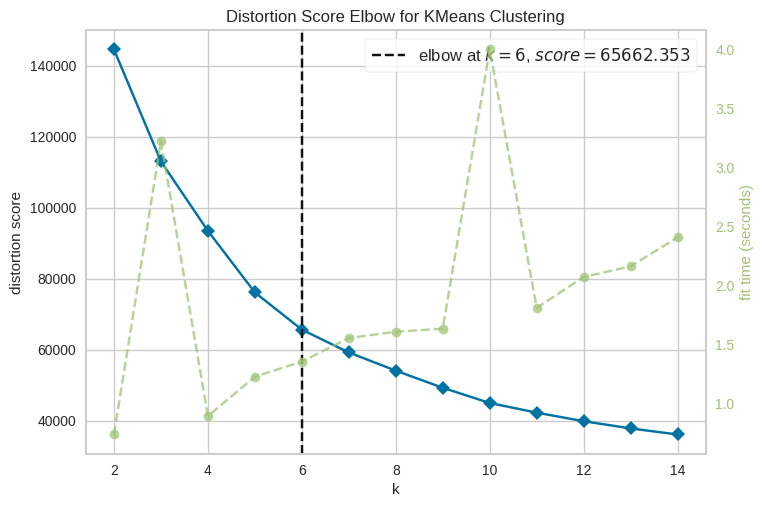

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(train)
visualizer.show()

In [12]:
# choose the best number of k
clf = KMeans(n_clusters=6)
pred = clf.fit_predict(train)
pred = [str(i) for i in pred]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [13]:
# use tsne to plot the clusters
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(train)
projections_df = pd.DataFrame(projections)
projections_df['Cluster']=pred

# New section

In [14]:
fig = px.scatter(
    projections_df, x=0, y=1,
    color='Cluster',
    labels={'color': 'Cluster'},
    #category_orders={"Cluster": ["0", "1", "2", "3","4",'5']}
)

fig.update_layout(height=600, width=1200,title='TSNE: Running Route Clustering',font_size=22)
fig.show()

In [15]:
t = df_cluster.copy()
t['K_means'] = pred
t = t.groupby('K_means').mean()

In [16]:
x_axis = ['Cluster '+str(i) for i in range(len(t))]
fig = go.Figure(data=[
    go.Bar(name='Distance', x=x_axis, y=t['distance']*100),
    go.Bar(name='Change of Altitude', x=x_axis, y=t['change_alti']),
    go.Bar(name='Diff_Altitude', x=x_axis, y=t['diff_alti']),
    go.Bar(name='Avg_Altitude', x=x_axis, y=t['avg_alti'])
])
# Change the bar mode
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig.update_layout(barmode='group',font_size=22,height=600,width=1200,title = 'Clusters of Running')
fig.show()

In [17]:
df_sub['Cluster']=pred
df_run = df_sub.copy()

In [18]:
df_run

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster
0,321063199,4969375,male,run,3888,436.0,8.650000,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,"[12.698946852577029, 10.911666227748753, 10.05...","[7, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, ...",True,-31.706000,762.000000,41.2000,-360.80000,402.00000,8.255823,4
1,303565793,4969375,male,run,4204,577.0,14.370000,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,"[5.790011898354694, 7.923126352508781, 8.85172...","[8, 8, 9, 8, 9, 8, 9, 8, 8, 9, 8, 9, 8, 9, 8, ...",True,41.671200,205.800000,57.8000,23.20000,34.60000,12.202044,0
2,296982347,4969375,male,run,6503,1025.0,22.220000,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,"[7.1452896790820954, 9.460093775795364, 10.251...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...",True,34.125600,248.000000,44.8000,24.60000,20.20000,12.104143,3
3,295890426,4969375,male,run,5118,775.0,16.980000,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,"[10.820442933212894, 10.685701145251175, 10.36...","[10, 10, 10, 11, 10, 10, 10, 11, 10, 10, 10, 1...",True,45.097200,191.800000,67.0000,27.00000,40.00000,11.824599,0
4,294163731,4969375,male,run,3035,445.0,9.670000,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,"[5.368254738393704, 6.557825426283524, 7.28499...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, ...",True,48.845600,252.000000,71.2000,0.40000,70.80000,11.395391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,298971490,69,male,run,2047,623.0,6.013510,155.294,"[11.76463108509779, 11.76454659551382, 11.7644...","[55.24085112847388, 55.24080477654934, 55.2407...",...,"[6.692081401008283, 9.190715975634406, 9.97964...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, ...",True,21.016800,213.800000,38.6000,13.40000,25.20000,10.481452,0
36996,235763396,69,male,run,7387,1374.0,21.310540,134.108,"[11.757076978683472, 11.757056526839733, 11.75...","[55.248560551553965, 55.24857848882675, 55.248...",...,"[8.566268841468748, 9.99318973861072, 9.922999...","[1, 12, 12, 21, 11, 12, 10, 37, 11, 6, 24, 13,...",True,-2.507600,190.000000,-1.0000,-3.60000,2.60000,10.158755,3
36997,235521923,69,male,run,14106,3000.0,43.460340,147.990,"[12.037591952830553, 12.037658086046576, 12.03...","[55.3915087133646, 55.39149438031018, 55.39146...",...,"[2.7071195127137395, 6.44568709366374, 7.45044...","[6, 17, 23, 14, 30, 22, 45, 28, 12, 31, 26, 39...",True,37.257200,454.400000,49.4000,29.60000,19.80000,10.870137,3
36998,596953078,69,male,run,5122,1554.0,16.069464,140.498,"[11.76487541, 11.76516151, 11.7653389, 11.7655...","[55.24080276, 55.24095154, 55.24104691, 55.241...",...,"[8.840720218610855, 9.263224919203076, 9.54057...","[10, 5, 10, 10, 12, 2, 5, 8, 10, 14, 9, 12, 10...",True,35.584400,266.800000,72.2000,6.60000,65.60000,11.188197,0


# Cluster for Biking

In [19]:
df_sub = df[df['sport']=='bike'].copy()
df_sub.reset_index(drop=1,inplace=True)
df_sub

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_distance,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed
0,396826535,10921915,male,bike,7589,1562.000,53.880000,152.650,"[24.64977040886879, 24.65014273300767, 24.6509...","[60.173348765820265, 60.173239801079035, 60.17...",...,"[0.023920359645758085, 0.0513686868631109, 0.0...","[10.764161840591138, 16.81157024610902, 15.919...","[8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...",True,43.0712,820.6,74.2,14.6,59.6,25.568980
1,392337038,10921915,male,bike,4440,908.000,32.610000,147.710,"[24.649855233728886, 24.65015547350049, 24.650...","[60.173247596248984, 60.17320962622762, 60.172...",...,"[0.01714931222251621, 0.047614484656155226, 0....","[12.34750480021167, 14.284345396846566, 17.330...","[5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...",True,35.7248,454.2,67.8,17.2,50.6,27.129599
2,386729739,10921915,male,bike,4519,921.000,32.700000,147.020,"[24.649874344468117, 24.650242729112506, 24.65...","[60.173286236822605, 60.17323946580291, 60.173...",...,"[0.02104899112126496, 0.03733382239564792, 0.0...","[12.629394672758975, 16.800220078041566, 20.17...","[6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...",True,32.6104,481.4,64.0,12.4,51.6,26.651989
3,371302193,10921915,male,bike,4422,889.000,32.650000,145.914,"[24.65018338523805, 24.650422520935535, 24.650...","[60.17324591986835, 60.17319998703897, 60.1730...",...,"[0.014204602439679812, 0.028542833923925526, 0...","[12.78414219571183, 17.125700354355313, 20.887...","[4, 6, 9, 5, 10, 4, 4, 6, 10, 10, 5, 10, 11, 4...",True,22.1912,522.4,56.4,4.0,52.4,27.306088
4,366977747,10921915,male,bike,6770,1222.000,46.370000,143.224,"[24.64970293454826, 24.65009386651218, 24.6508...","[60.173228066414595, 60.173104433342814, 60.17...",...,"[0.02565751019948074, 0.055649820287697715, 0....","[10.263004079792296, 13.355956869047452, 19.92...","[9, 15, 23, 5, 10, 18, 12, 17, 7, 12, 19, 17, ...",True,48.5860,701.6,79.4,21.2,58.2,24.824423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25194,571917798,69,male,bike,1190,336.478,9.709200,151.938,"[166.948185, 166.94821, 166.948254, 166.948309...","[-11.639523, -11.639488, -11.639445, -11.63939...",...,"[0.004755375022161955, 0.00677446292991385, 0....","[8.559675039891518, 12.19403327384493, 14.1870...","[2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, ...",True,21.2780,221.0,56.6,0.0,56.6,29.445809
25195,571917904,69,male,bike,1286,373.303,9.981400,155.380,"[166.948344, 166.948366, 166.948437, 166.94849...","[-11.639403, -11.639357, -11.639261, -11.63917...",...,"[0.005653641386970405, 0.013191290032571664, 0...","[10.17655449654673, 15.829548039085996, 20.603...","[2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, ...",True,20.9212,219.8,56.6,0.0,56.6,28.043967
25196,623853034,69,male,bike,5439,1198.000,43.532416,147.408,"[11.97089291, 11.97083759, 11.97060299, 11.970...","[55.56586075, 55.56583786, 55.56570816, 55.565...",...,"[0.004311449763158366, 0.020639913919802334, 0...","[15.521219147370116, 18.5759225278221, 15.4956...","[1, 4, 9, 7, 2, 5, 10, 2, 22, 9, 3, 47, 6, 11,...",True,36.3676,642.2,78.2,5.0,73.2,28.694410
25197,623853358,69,male,bike,5426,1129.000,43.671405,140.582,"[11.97151852, 11.9715023, 11.97143173, 11.9709...","[55.56573868, 55.56574631, 55.56576157, 55.565...",...,"[0.0013270337976171373, 0.004752050562510226, ...","[4.777321671421694, 2.1384227531296016, 11.015...","[1, 8, 11, 9, 8, 7, 3, 10, 18, 2, 10, 14, 15, ...",True,49.7648,615.2,93.6,23.0,70.6,28.514537


In [20]:
feature = ['id','distance','change_alti','diff_alti','avg_alti','min_alti','max_alti']
df_cluster = df_sub[feature]

train = df_cluster.drop('id',axis=1)
t= preprocessing.StandardScaler().fit(train)
train=t.transform(train)
train

array([[ 0.95930716,  0.87382707, -0.1956381 , -0.40509062, -0.41827466,
        -0.41233428],
       [-0.07215947, -0.07796276, -0.29983512, -0.44290112, -0.40376929,
        -0.44105855],
       [-0.06779502, -0.00730588, -0.28825767, -0.45893034, -0.43054843,
        -0.45811359],
       ...,
       [ 0.45751177,  0.41040102, -0.03818481, -0.43959275, -0.47183295,
        -0.39438161],
       [ 0.4642519 ,  0.34026366, -0.06828617, -0.37063995, -0.37141115,
        -0.32526383],
       [ 0.44740359,  0.35481067, -0.06828617, -0.38722914, -0.40376929,
        -0.3512952 ]])

In [21]:
%%time
ch_score = []
ss_score = []
meandistortions = []
for k in range(2,15):
    clf = KMeans(n_clusters=k)
    pred = clf.fit_predict(train)
    ch = metrics.calinski_harabasz_score(train,pred)
    ss = metrics.silhouette_score(train,pred)
    ch_score.append(ch)
    ss_score.append(ss)
    meandistortions.append(sum(np.min(cdist(train, clf.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

CPU times: user 2min 9s, sys: 39.5 s, total: 2min 48s
Wall time: 2min 6s


In [22]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Calinski Harabasz Score", "Elbow Score",'Silhouette Score'))

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ch_score,
                    mode='lines+markers',),row=1,col=1)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ss_score,
                    mode='lines+markers',
                    name='lines'),row=1,col=3,)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=meandistortions,
                    mode='lines+markers',
                    name='lines'),row=1,col=2,)

fig.update_layout(height=600, width=1200, title_text="Biking: Number of K",showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

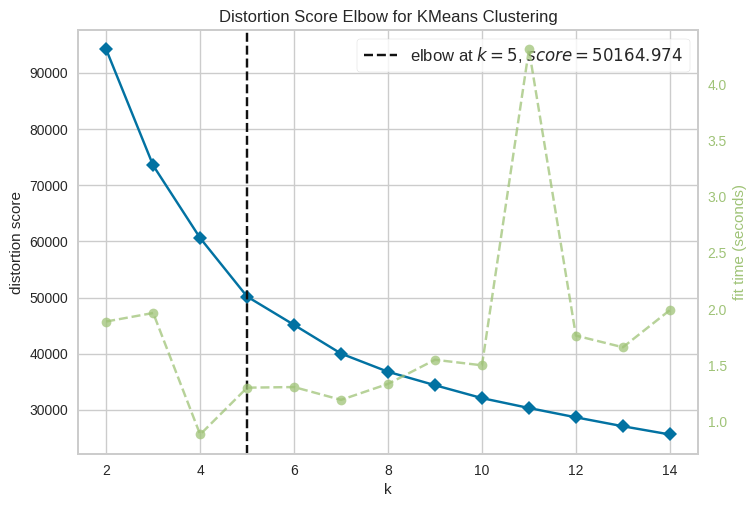

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(train)
visualizer.show()

In [24]:
clf = KMeans(n_clusters=5)
pred = clf.fit_predict(train)
pred = [str(i) for i in pred]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(train)

In [26]:
projections_df = pd.DataFrame(projections)
projections_df['Cluster']=pred

In [27]:
fig = px.scatter(
    projections_df, x=0, y=1,
    color='Cluster',
    labels={'color': 'Cluster'},
    category_orders={"Cluster": ["0", "1", "2", "3","4"]}
)

fig.update_layout(height=600, width=1200,title='TSNE: Biking Route Clustering',font_size=22)
fig.show()

In [28]:
t = df_cluster.copy()
t['K_means'] = pred
t = t.groupby('K_means').mean()

In [29]:
x_axis = ['Cluster '+str(i) for i in range(len(t))]
fig = go.Figure(data=[
    go.Bar(name='Distance', x=x_axis, y=t['distance']*100),
    go.Bar(name='Change of Altitude', x=x_axis, y=t['change_alti']),
    go.Bar(name='Diff_Altitude', x=x_axis, y=t['diff_alti']),
    go.Bar(name='Avg_Altitude', x=x_axis, y=t['avg_alti'])
])
# Change the bar mode
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig.update_layout(barmode='group',font_size=22,height=600,width=1200,title = 'Cluster of Biking')
fig.show()

In [30]:
df_sub['Cluster']=pred
df_bike = df_sub.copy()

In [31]:
df_bike

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster
0,396826535,10921915,male,bike,7589,1562.000,53.880000,152.650,"[24.64977040886879, 24.65014273300767, 24.6509...","[60.173348765820265, 60.173239801079035, 60.17...",...,"[10.764161840591138, 16.81157024610902, 15.919...","[8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...",True,43.0712,820.6,74.2,14.6,59.6,25.568980,0
1,392337038,10921915,male,bike,4440,908.000,32.610000,147.710,"[24.649855233728886, 24.65015547350049, 24.650...","[60.173247596248984, 60.17320962622762, 60.172...",...,"[12.34750480021167, 14.284345396846566, 17.330...","[5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...",True,35.7248,454.2,67.8,17.2,50.6,27.129599,3
2,386729739,10921915,male,bike,4519,921.000,32.700000,147.020,"[24.649874344468117, 24.650242729112506, 24.65...","[60.173286236822605, 60.17323946580291, 60.173...",...,"[12.629394672758975, 16.800220078041566, 20.17...","[6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...",True,32.6104,481.4,64.0,12.4,51.6,26.651989,3
3,371302193,10921915,male,bike,4422,889.000,32.650000,145.914,"[24.65018338523805, 24.650422520935535, 24.650...","[60.17324591986835, 60.17319998703897, 60.1730...",...,"[12.78414219571183, 17.125700354355313, 20.887...","[4, 6, 9, 5, 10, 4, 4, 6, 10, 10, 5, 10, 11, 4...",True,22.1912,522.4,56.4,4.0,52.4,27.306088,3
4,366977747,10921915,male,bike,6770,1222.000,46.370000,143.224,"[24.64970293454826, 24.65009386651218, 24.6508...","[60.173228066414595, 60.173104433342814, 60.17...",...,"[10.263004079792296, 13.355956869047452, 19.92...","[9, 15, 23, 5, 10, 18, 12, 17, 7, 12, 19, 17, ...",True,48.5860,701.6,79.4,21.2,58.2,24.824423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25194,571917798,69,male,bike,1190,336.478,9.709200,151.938,"[166.948185, 166.94821, 166.948254, 166.948309...","[-11.639523, -11.639488, -11.639445, -11.63939...",...,"[8.559675039891518, 12.19403327384493, 14.1870...","[2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, ...",True,21.2780,221.0,56.6,0.0,56.6,29.445809,3
25195,571917904,69,male,bike,1286,373.303,9.981400,155.380,"[166.948344, 166.948366, 166.948437, 166.94849...","[-11.639403, -11.639357, -11.639261, -11.63917...",...,"[10.17655449654673, 15.829548039085996, 20.603...","[2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, ...",True,20.9212,219.8,56.6,0.0,56.6,28.043967,3
25196,623853034,69,male,bike,5439,1198.000,43.532416,147.408,"[11.97089291, 11.97083759, 11.97060299, 11.970...","[55.56586075, 55.56583786, 55.56570816, 55.565...",...,"[15.521219147370116, 18.5759225278221, 15.4956...","[1, 4, 9, 7, 2, 5, 10, 2, 22, 9, 3, 47, 6, 11,...",True,36.3676,642.2,78.2,5.0,73.2,28.694410,0
25197,623853358,69,male,bike,5426,1129.000,43.671405,140.582,"[11.97151852, 11.9715023, 11.97143173, 11.9709...","[55.56573868, 55.56574631, 55.56576157, 55.565...",...,"[4.777321671421694, 2.1384227531296016, 11.015...","[1, 8, 11, 9, 8, 7, 3, 10, 18, 2, 10, 14, 15, ...",True,49.7648,615.2,93.6,23.0,70.6,28.514537,0


# Cluster for mountain bike

In [32]:
df_sub = df[df['sport']=='mountain bike'].copy()
df_sub.reset_index(drop=1,inplace=True)
df_sub

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_distance,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed
0,334121582,13279851,male,mountain bike,4209,585.0,26.410000,123.710,"[5.439254678785801, 5.439083268865943, 5.43904...","[52.01802771538496, 52.017894526943564, 52.017...",...,"[0.018902475274583067, 0.009400992108153514, 0...","[11.34148516474984, 11.281190529784217, 12.608...","[6, 3, 3, 6, 3, 6, 3, 4, 8, 6, 6, 6, 4, 3, 3, ...",True,9.014000,293.600,39.800,-0.800,40.600,22.590984
1,299896527,13279851,male,mountain bike,5205,969.0,26.710000,149.772,"[5.523203210905194, 5.522962063550949, 5.52271...","[52.025884576141834, 52.02558291144669, 52.025...",...,"[0.03739824941600433, 0.04238438458152925, 0.0...","[11.219474824801297, 15.25837844935053, 17.691...","[12, 10, 11, 11, 10, 11, 10, 11, 10, 10, 11, 1...",True,31.734800,695.600,70.000,5.800,64.200,17.671215
2,280861813,13279851,male,mountain bike,4016,695.0,19.200000,141.698,"[5.52276567555964, 5.522626284509897, 5.522374...","[52.02590234577656, 52.02570897527039, 52.0253...",...,"[0.02355992050528061, 0.03855914048723234, 0.0...","[12.116530545572886, 17.351613219254556, 17.69...","[7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",True,28.206800,491.000,67.200,4.000,63.200,16.613655
3,268331036,13279851,male,mountain bike,4593,977.0,26.400000,138.136,"[5.5180043, 5.5177206, 5.5170584, 5.5165136, 5...","[52.0259099, 52.0255485, 52.0246936, 52.023993...",...,"[0.044642134006436636, 0.10533897946360782, 0....","[20.088960302896485, 22.307078004058127, 22.21...","[8, 17, 14, 14, 9, 14, 7, 11, 11, 13, 18, 7, 1...",True,37.839200,424.400,68.000,4.400,63.600,20.892892
4,268331062,13279851,male,mountain bike,6265,1183.0,45.800000,137.708,"[5.5487193, 5.5486971, 5.5482386, 5.5468608, 5...","[52.0036153, 52.0037062, 52.0038875, 52.004203...",...,"[0.010232248372871601, 0.03731884619806046, 0....","[9.209023535584441, 19.19254947328824, 21.3223...","[4, 7, 17, 14, 6, 12, 6, 14, 7, 7, 15, 11, 11,...",True,27.525200,515.200,57.400,8.600,48.800,25.993500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,326038483,4101,male,mountain bike,4342,979.0,14.595000,144.944,"[10.20356, 10.203871667, 10.204268333, 10.2045...","[55.431498333, 55.431458333, 55.431435, 55.431...",...,"[0.020166490148327013, 0.025168122109977153, 0...","[9.074920566747156, 10.06724884399086, 13.9825...","[8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 9, 9, ...",True,34.478000,509.000,56.000,0.000,56.000,11.493772
3445,325108919,4101,male,mountain bike,7991,1668.0,23.995300,132.948,"[10.204013333, 10.204566667, 10.205966667, 10....","[55.431515, 55.431685, 55.43218, 55.432563333,...",...,"[0.03972465658606036, 0.10412458317327904, 0.0...","[9.533917580654485, 23.428031213987783, 10.850...","[15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...",True,38.442000,808.000,65.000,20.000,45.000,10.083837
3446,325107241,4101,male,mountain bike,4816,1015.0,12.216500,134.980,"[10.20358, 10.203926667, 10.20437, 10.204585, ...","[55.431656667, 55.431608333, 55.431556667, 55....",...,"[0.0225514122381834, 0.028633074860945698, 0.0...","[9.02056489527336, 10.30790694994045, 8.784995...","[9, 10, 9, 10, 10, 9, 10, 10, 9, 10, 9, 10, 10...",True,37.138000,472.000,57.000,14.000,43.000,8.922899
3447,323643540,4101,male,mountain bike,8814,1932.9,24.250000,135.506,"[10.20388, 10.20465, 10.206198333, 10.20629166...","[55.431536667, 55.431798333, 55.432343333, 55....",...,"[0.05665325215438958, 0.1149959416241168, 0.03...","[11.997159279753086, 22.99918832482336, 6.5228...","[17, 18, 17, 18, 18, 17, 18, 18, 17, 18, 17, 1...",True,43.222000,918.000,72.000,24.000,48.000,9.095042


In [33]:
feature = ['id','distance','change_alti','diff_alti','avg_alti','min_alti','max_alti']
df_cluster = df_sub[feature]

train = df_cluster.drop('id',axis=1)
t= preprocessing.StandardScaler().fit(train)
train=t.transform(train)
train

array([[ 0.00618676, -0.75577327, -0.62881713, -0.55520711, -0.47862912,
        -0.57890587],
       [ 0.02562876,  0.07993506, -0.40576661, -0.49528323, -0.4601095 ,
        -0.50517099],
       [-0.46106925, -0.34540306, -0.41521791, -0.50458799, -0.4651603 ,
        -0.51200733],
       ...,
       [-0.91364655, -0.38490172, -0.60613403, -0.48103282, -0.43710027,
        -0.53691117],
       [-0.13379562,  0.54227717, -0.55887756, -0.46498687, -0.40904024,
        -0.50028788],
       [ 0.55136899,  3.68457167,  1.63265992,  0.29691885,  0.1175652 ,
         0.52406054]])

In [34]:
%%time
ch_score = []
ss_score = []
meandistortions = []
for k in range(2,15):
    clf = KMeans(n_clusters=k)
    pred = clf.fit_predict(train)
    ch = metrics.calinski_harabasz_score(train,pred)
    ss = metrics.silhouette_score(train,pred)
    ch_score.append(ch)
    ss_score.append(ss)
    meandistortions.append(sum(np.min(cdist(train, clf.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

CPU times: user 12.5 s, sys: 6.33 s, total: 18.9 s
Wall time: 11.5 s


In [35]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Calinski Harabasz Score", "Elbow Score",'Silhouette Score'))

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ch_score,
                    mode='lines+markers',),row=1,col=1)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ss_score,
                    mode='lines+markers',
                    name='lines'),row=1,col=3,)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=meandistortions,
                    mode='lines+markers',
                    name='lines'),row=1,col=2,)

fig.update_layout(height=600, width=1200, title_text="Mountain Bike: Number of K",showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

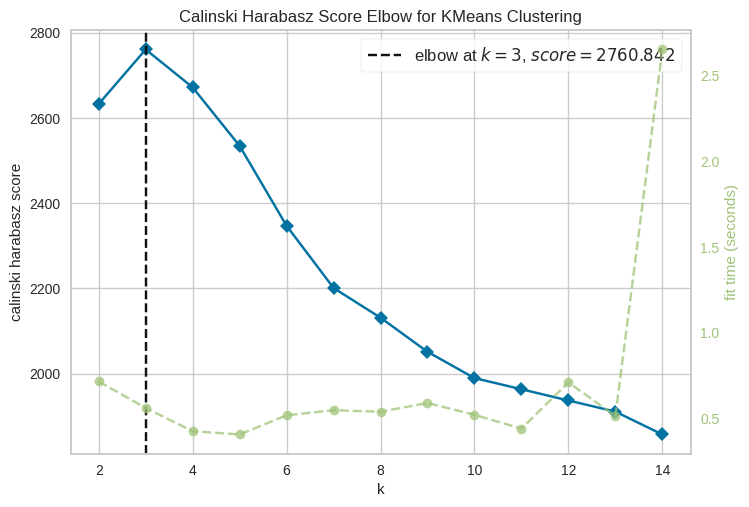

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [36]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz')
visualizer.fit(train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
clf = KMeans(n_clusters=3)
pred = clf.fit_predict(train)
pred = [str(i) for i in pred]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(train)

In [39]:
projections_df = pd.DataFrame(projections)
projections_df['Cluster']=pred

In [40]:
fig = px.scatter(
    projections_df, x=0, y=1,
    color='Cluster',
    labels={'color': 'Cluster'},
    category_orders={"Cluster": ["0", "1", "2", "3","4"]}
)

fig.update_layout(height=600, width=1200,title='TSNE: Mountain Biking Route Clustering',font_size=22)
fig.show()

In [41]:
t = df_cluster.copy()
t['K_means'] = pred
t = t.groupby('K_means').mean()

In [42]:
x_axis = ['Cluster '+str(i) for i in range(len(t))]
fig = go.Figure(data=[
    go.Bar(name='Distance', x=x_axis, y=t['distance']*100),
    go.Bar(name='Change of Altitude', x=x_axis, y=t['change_alti']),
    go.Bar(name='Diff_Altitude', x=x_axis, y=t['diff_alti']),
    go.Bar(name='Avg_Altitude', x=x_axis, y=t['avg_alti'])
])
# Change the bar mode
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig.update_layout(barmode='group',font_size=22,height=600,width=1200,title = 'Cluster of Mountain Biking')
fig.show()

In [43]:
df_sub['Cluster']=pred
df_mountain = df_sub.copy()

In [44]:
df_mountain

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster
0,334121582,13279851,male,mountain bike,4209,585.0,26.410000,123.710,"[5.439254678785801, 5.439083268865943, 5.43904...","[52.01802771538496, 52.017894526943564, 52.017...",...,"[11.34148516474984, 11.281190529784217, 12.608...","[6, 3, 3, 6, 3, 6, 3, 4, 8, 6, 6, 6, 4, 3, 3, ...",True,9.014000,293.600,39.800,-0.800,40.600,22.590984,1
1,299896527,13279851,male,mountain bike,5205,969.0,26.710000,149.772,"[5.523203210905194, 5.522962063550949, 5.52271...","[52.025884576141834, 52.02558291144669, 52.025...",...,"[11.219474824801297, 15.25837844935053, 17.691...","[12, 10, 11, 11, 10, 11, 10, 11, 10, 10, 11, 1...",True,31.734800,695.600,70.000,5.800,64.200,17.671215,1
2,280861813,13279851,male,mountain bike,4016,695.0,19.200000,141.698,"[5.52276567555964, 5.522626284509897, 5.522374...","[52.02590234577656, 52.02570897527039, 52.0253...",...,"[12.116530545572886, 17.351613219254556, 17.69...","[7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",True,28.206800,491.000,67.200,4.000,63.200,16.613655,1
3,268331036,13279851,male,mountain bike,4593,977.0,26.400000,138.136,"[5.5180043, 5.5177206, 5.5170584, 5.5165136, 5...","[52.0259099, 52.0255485, 52.0246936, 52.023993...",...,"[20.088960302896485, 22.307078004058127, 22.21...","[8, 17, 14, 14, 9, 14, 7, 11, 11, 13, 18, 7, 1...",True,37.839200,424.400,68.000,4.400,63.600,20.892892,1
4,268331062,13279851,male,mountain bike,6265,1183.0,45.800000,137.708,"[5.5487193, 5.5486971, 5.5482386, 5.5468608, 5...","[52.0036153, 52.0037062, 52.0038875, 52.004203...",...,"[9.209023535584441, 19.19254947328824, 21.3223...","[4, 7, 17, 14, 6, 12, 6, 14, 7, 7, 15, 11, 11,...",True,27.525200,515.200,57.400,8.600,48.800,25.993500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,326038483,4101,male,mountain bike,4342,979.0,14.595000,144.944,"[10.20356, 10.203871667, 10.204268333, 10.2045...","[55.431498333, 55.431458333, 55.431435, 55.431...",...,"[9.074920566747156, 10.06724884399086, 13.9825...","[8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 9, 9, ...",True,34.478000,509.000,56.000,0.000,56.000,11.493772,1
3445,325108919,4101,male,mountain bike,7991,1668.0,23.995300,132.948,"[10.204013333, 10.204566667, 10.205966667, 10....","[55.431515, 55.431685, 55.43218, 55.432563333,...",...,"[9.533917580654485, 23.428031213987783, 10.850...","[15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...",True,38.442000,808.000,65.000,20.000,45.000,10.083837,1
3446,325107241,4101,male,mountain bike,4816,1015.0,12.216500,134.980,"[10.20358, 10.203926667, 10.20437, 10.204585, ...","[55.431656667, 55.431608333, 55.431556667, 55....",...,"[9.02056489527336, 10.30790694994045, 8.784995...","[9, 10, 9, 10, 10, 9, 10, 10, 9, 10, 9, 10, 10...",True,37.138000,472.000,57.000,14.000,43.000,8.922899,1
3447,323643540,4101,male,mountain bike,8814,1932.9,24.250000,135.506,"[10.20388, 10.20465, 10.206198333, 10.20629166...","[55.431536667, 55.431798333, 55.432343333, 55....",...,"[11.997159279753086, 22.99918832482336, 6.5228...","[17, 18, 17, 18, 18, 17, 18, 18, 17, 18, 17, 1...",True,43.222000,918.000,72.000,24.000,48.000,9.095042,1


# **Cluster for walk :**

In [45]:
df_sub = df[df['sport']=='walk'].copy()
df_sub.reset_index(drop=1,inplace=True)
df_sub

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_distance,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed
0,396900566,182042,female,walk,4697,394.000,5.430000,108.118,"[-94.5817563124001, -94.58174264989793, -94.58...","[39.11012951284647, 39.110134122893214, 39.110...",...,"[0.0012858391156193665, 0.015725933067500523, ...","[4.629020816229719, 7.076669880375236, 7.13232...","[1, 8, 2, 8, 10, 3, 5, 7, 10, 16, 7, 12, 5, 13...",True,242.171874,196.792,266.587,218.989,47.598,4.316904
1,396904614,182042,female,walk,2766,250.000,4.230000,105.126,"[-94.66002375818789, -94.66001671738923, -94.6...","[38.91656303778291, 38.91656253486872, 38.9165...",...,"[0.001007184261836948, 0.0059809975588200745, ...","[1.8129316713065062, 4.306318242350454, 4.2485...","[2, 5, 2, 3, 1, 2, 2, 5, 4, 4, 6, 4, 3, 1, 3, ...",True,282.452184,322.182,301.185,181.591,119.594,5.746200
2,21766773,182042,female,walk,4804,521.716,6.570000,101.500,"[-94.97209710069001, -94.97210489585996, -94.9...","[38.91350389458239, 38.91350917518139, 38.9135...",...,"[0.0008945092045974837, 0.006435183757851211, ...","[3.2202331365509416, 3.8611102547107263, 3.916...","[1, 6, 3, 8, 14, 13, 2, 18, 19, 19, 6, 8, 8, 1...",True,264.634400,232.400,287.200,248.400,38.800,4.850610
3,396915081,182042,female,walk,2069,115.000,2.570000,98.840,"[-94.65990716591477, -94.65992988087237, -94.6...","[38.91603933647275, 38.91605551354587, 38.9162...",...,"[0.002731722785632852, 0.03074107862367243, 0....","[9.834202028278266, 10.060716640474613, 17.709...","[1, 11, 2, 4, 5, 1, 3, 31, 5, 1, 4, 29, 3, 1, ...",True,288.589938,1028.765,326.584,201.390,125.194,6.815167
4,20441418,182042,female,walk,3656,471.846,5.940000,117.562,"[-94.65908129699528, -94.65909722261131, -94.6...","[38.91469907015562, 38.91471331939101, 38.9147...",...,"[0.0021004137979460605, 0.004276848521113683, ...","[2.5204965575352727, 3.8491636690023148, 4.263...","[3, 4, 8, 5, 5, 3, 8, 7, 3, 7, 7, 10, 8, 3, 9,...",True,289.434000,156.400,301.800,280.000,21.800,5.829859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,181140320,3191096,male,walk,697,116.487,1.078260,114.428,"[-77.4130381, -77.4130381, -77.4130541, -77.41...","[39.1449366, 39.1449366, 39.1449426, 39.144947...",...,"[0.00020000000000000573, 0.0015331123639666343...","[0.7200000000000206, 5.5192045102798835, 5.514...","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...",True,102.839600,47.600,108.800,99.000,9.800,5.532914
665,180796349,3191096,male,walk,1380,199.091,1.979493,105.004,"[-77.1274678, -77.1274837, -77.1274992, -77.12...","[39.0506531, 39.0506576, 39.0506659, 39.050672...",...,"[0.001461804671055836, 0.002021121982242266, 0...","[2.6312484079005047, 3.638019568036079, 3.4424...","[2, 2, 2, 2, 4, 2, 4, 4, 5, 3, 3, 2, 2, 2, 3, ...",True,29.350800,47.000,38.800,17.800,21.000,5.083377
666,167902987,3191096,male,walk,2277,402.892,1.207008,118.256,"[-75.5473007, -75.547298, -75.5473364, -75.547...","[39.7459734, 39.7459669, 39.7459489, 39.745934...",...,"[0.0007589735098076275, 0.004029118633261964, ...","[2.7323046353074587, 3.6262067699357674, 1.298...","[1, 4, 7, 2, 2, 1, 2, 2, 3, 3, 2, 5, 7, 2, 2, ...",True,59.228800,12.200,61.600,57.000,4.600,2.967224
667,166142940,3191096,male,walk,1342,247.756,1.593251,121.546,"[-82.3359101, -82.3359245, -82.3359419, -82.33...","[27.9421926, 27.9421703, 27.9421505, 27.942127...",...,"[0.002883520163789123, 0.0034312781956660674, ...","[5.190336294820422, 6.176300752198921, 5.51409...","[2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 3, ...",True,3.230000,29.200,7.400,-1.600,9.000,4.281360


In [46]:
# select faetures
feature = ['id','distance','change_alti','diff_alti','avg_alti','min_alti','max_alti']
df_cluster = df_sub[feature]

train = df_cluster.drop('id',axis=1)
t= preprocessing.StandardScaler().fit(train)
train=t.transform(train)
train

array([[-0.17467039, -0.18672379, -0.05526491,  0.05411857,  0.05925006,
         0.04067331],
       [-0.53748365,  0.17661435,  0.86623343,  0.19233474, -0.07245991,
         0.15319852],
       [ 0.17000222, -0.08354376, -0.16787314,  0.13119554,  0.16283105,
         0.10771424],
       ...,
       [-1.45146832, -0.72160945, -0.60560917, -0.57362462, -0.51125013,
        -0.62601854],
       [-1.33469005, -0.67234916, -0.54929226, -0.76577656, -0.71763027,
        -0.80229654],
       [-1.39307918, -0.70770067, -0.53137324, -0.55177511, -0.49998023,
        -0.59674729]])

In [47]:
%%time
ch_score = []
ss_score = []
meandistortions = []
# try k from 2 to 15
for k in range(2,15):
    clf = KMeans(n_clusters=k)
    pred = clf.fit_predict(train)
    ch = metrics.calinski_harabasz_score(train,pred)
    ss = metrics.silhouette_score(train,pred)
    ch_score.append(ch)
    ss_score.append(ss)
    meandistortions.append(sum(np.min(cdist(train, clf.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

CPU times: user 4.28 s, sys: 672 ms, total: 4.95 s
Wall time: 3.94 s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [48]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Calinski Harabasz Score", "Elbow Score",'Silhouette Score'))

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ch_score,
                    mode='lines+markers',),row=1,col=1)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=ss_score,
                    mode='lines+markers',
                    name='lines'),row=1,col=3,)

fig.add_trace(go.Scatter(x=list(range(2,15)), y=meandistortions,
                    mode='lines+markers',
                    name='lines'),row=1,col=2,)

fig.update_layout(height=600, width=1200, title_text="Running: Number of K",showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

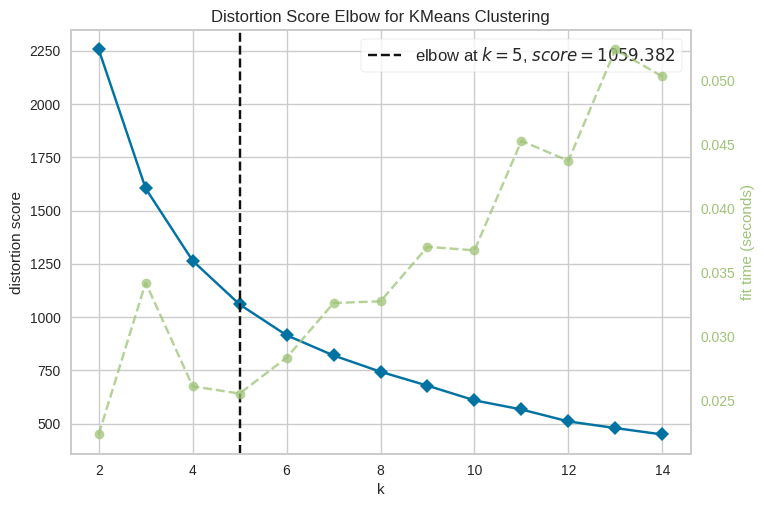

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(train)
visualizer.show()

In [50]:
# choose the best number of k
clf = KMeans(n_clusters=5)
pred = clf.fit_predict(train)
pred = [str(i) for i in pred]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [51]:
# use tsne to plot the clusters
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(train)
projections_df = pd.DataFrame(projections)
projections_df['Cluster']=pred

In [52]:
fig = px.scatter(
    projections_df, x=0, y=1,
    color='Cluster',
    labels={'color': 'Cluster'},
    #category_orders={"Cluster": ["0", "1", "2", "3","4"]}
)

fig.update_layout(height=600, width=1200,title='TSNE: Walk Route Clustering',font_size=22)
fig.show()

In [53]:
t = df_cluster.copy()
t['K_means'] = pred
t = t.groupby('K_means').mean()

In [54]:
x_axis = ['Cluster '+str(i) for i in range(len(t))]
fig = go.Figure(data=[
    go.Bar(name='Distance', x=x_axis, y=t['distance']*100),
    go.Bar(name='Change of Altitude', x=x_axis, y=t['change_alti']),
    go.Bar(name='Diff_Altitude', x=x_axis, y=t['diff_alti']),
    go.Bar(name='Avg_Altitude', x=x_axis, y=t['avg_alti'])
])
# Change the bar mode
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig.update_layout(barmode='group',font_size=22,height=600,width=1200,title = 'Clusters of Walk')
fig.show()

In [55]:
df_sub['Cluster']=pred
df_walk = df_sub.copy()

In [56]:

print(len(df_walk))

669


In [57]:
df_walk

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,derived_speed,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster
0,396900566,182042,female,walk,4697,394.000,5.430000,108.118,"[-94.5817563124001, -94.58174264989793, -94.58...","[39.11012951284647, 39.110134122893214, 39.110...",...,"[4.629020816229719, 7.076669880375236, 7.13232...","[1, 8, 2, 8, 10, 3, 5, 7, 10, 16, 7, 12, 5, 13...",True,242.171874,196.792,266.587,218.989,47.598,4.316904,0
1,396904614,182042,female,walk,2766,250.000,4.230000,105.126,"[-94.66002375818789, -94.66001671738923, -94.6...","[38.91656303778291, 38.91656253486872, 38.9165...",...,"[1.8129316713065062, 4.306318242350454, 4.2485...","[2, 5, 2, 3, 1, 2, 2, 5, 4, 4, 6, 4, 3, 1, 3, ...",True,282.452184,322.182,301.185,181.591,119.594,5.746200,0
2,21766773,182042,female,walk,4804,521.716,6.570000,101.500,"[-94.97209710069001, -94.97210489585996, -94.9...","[38.91350389458239, 38.91350917518139, 38.9135...",...,"[3.2202331365509416, 3.8611102547107263, 3.916...","[1, 6, 3, 8, 14, 13, 2, 18, 19, 19, 6, 8, 8, 1...",True,264.634400,232.400,287.200,248.400,38.800,4.850610,0
3,396915081,182042,female,walk,2069,115.000,2.570000,98.840,"[-94.65990716591477, -94.65992988087237, -94.6...","[38.91603933647275, 38.91605551354587, 38.9162...",...,"[9.834202028278266, 10.060716640474613, 17.709...","[1, 11, 2, 4, 5, 1, 3, 31, 5, 1, 4, 29, 3, 1, ...",True,288.589938,1028.765,326.584,201.390,125.194,6.815167,0
4,20441418,182042,female,walk,3656,471.846,5.940000,117.562,"[-94.65908129699528, -94.65909722261131, -94.6...","[38.91469907015562, 38.91471331939101, 38.9147...",...,"[2.5204965575352727, 3.8491636690023148, 4.263...","[3, 4, 8, 5, 5, 3, 8, 7, 3, 7, 7, 10, 8, 3, 9,...",True,289.434000,156.400,301.800,280.000,21.800,5.829859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,181140320,3191096,male,walk,697,116.487,1.078260,114.428,"[-77.4130381, -77.4130381, -77.4130541, -77.41...","[39.1449366, 39.1449366, 39.1449426, 39.144947...",...,"[0.7200000000000206, 5.5192045102798835, 5.514...","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...",True,102.839600,47.600,108.800,99.000,9.800,5.532914,4
665,180796349,3191096,male,walk,1380,199.091,1.979493,105.004,"[-77.1274678, -77.1274837, -77.1274992, -77.12...","[39.0506531, 39.0506576, 39.0506659, 39.050672...",...,"[2.6312484079005047, 3.638019568036079, 3.4424...","[2, 2, 2, 2, 4, 2, 4, 4, 5, 3, 3, 2, 2, 2, 3, ...",True,29.350800,47.000,38.800,17.800,21.000,5.083377,4
666,167902987,3191096,male,walk,2277,402.892,1.207008,118.256,"[-75.5473007, -75.547298, -75.5473364, -75.547...","[39.7459734, 39.7459669, 39.7459489, 39.745934...",...,"[2.7323046353074587, 3.6262067699357674, 1.298...","[1, 4, 7, 2, 2, 1, 2, 2, 3, 3, 2, 5, 7, 2, 2, ...",True,59.228800,12.200,61.600,57.000,4.600,2.967224,4
667,166142940,3191096,male,walk,1342,247.756,1.593251,121.546,"[-82.3359101, -82.3359245, -82.3359419, -82.33...","[27.9421926, 27.9421703, 27.9421505, 27.942127...",...,"[5.190336294820422, 6.176300752198921, 5.51409...","[2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 3, ...",True,3.230000,29.200,7.400,-1.600,9.000,4.281360,4


# Merge

In [58]:
df_all = df_run.copy()
df_all = df_all.append(df_bike)
df_all = df_all.append(df_mountain)
df_all=df_all.append(df_walk)
df_all.reset_index(drop=1,inplace=True)

<ipython-input-58-f94af22fdbd9>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-f94af22fdbd9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-f94af22fdbd9>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [59]:
df_all['sport'].unique()

array(['run', 'bike', 'mountain bike', 'walk'], dtype=object)

In [60]:
result_df = df_all.groupby('sport')['Cluster'].agg(['nunique', 'unique']).reset_index()
result_df.columns = ['sport', 'num_clusters', 'clusters']
result_df

,sport,num_clusters,clusters
0,bike,5,"[0, 3, 1, 4, 2]"
1,mountain bike,3,"[1, 0, 2]"
2,run,6,"[4, 0, 3, 1, 5, 2]"
3,walk,5,"[0, 1, 4, 2, 3]"


In [61]:
df_all['route'] = list(zip(df_all['sport'], df_all['Cluster']))

In [62]:
df_all

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,time_elapsed,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster,route
0,321063199,4969375,male,run,3888,436.000,8.650000,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,"[7, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, ...",True,-31.7060,762.0,41.2,-360.8,402.0,8.255823,4,"(run, 4)"
1,303565793,4969375,male,run,4204,577.000,14.370000,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,"[8, 8, 9, 8, 9, 8, 9, 8, 8, 9, 8, 9, 8, 9, 8, ...",True,41.6712,205.8,57.8,23.2,34.6,12.202044,0,"(run, 0)"
2,296982347,4969375,male,run,6503,1025.000,22.220000,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...",True,34.1256,248.0,44.8,24.6,20.2,12.104143,3,"(run, 3)"
3,295890426,4969375,male,run,5118,775.000,16.980000,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,"[10, 10, 10, 11, 10, 10, 10, 11, 10, 10, 10, 1...",True,45.0972,191.8,67.0,27.0,40.0,11.824599,0,"(run, 0)"
4,294163731,4969375,male,run,3035,445.000,9.670000,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, ...",True,48.8456,252.0,71.2,0.4,70.8,11.395391,0,"(run, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66312,181140320,3191096,male,walk,697,116.487,1.078260,114.428,"[-77.4130381, -77.4130381, -77.4130541, -77.41...","[39.1449366, 39.1449366, 39.1449426, 39.144947...",...,"[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...",True,102.8396,47.6,108.8,99.0,9.8,5.532914,4,"(walk, 4)"
66313,180796349,3191096,male,walk,1380,199.091,1.979493,105.004,"[-77.1274678, -77.1274837, -77.1274992, -77.12...","[39.0506531, 39.0506576, 39.0506659, 39.050672...",...,"[2, 2, 2, 2, 4, 2, 4, 4, 5, 3, 3, 2, 2, 2, 3, ...",True,29.3508,47.0,38.8,17.8,21.0,5.083377,4,"(walk, 4)"
66314,167902987,3191096,male,walk,2277,402.892,1.207008,118.256,"[-75.5473007, -75.547298, -75.5473364, -75.547...","[39.7459734, 39.7459669, 39.7459489, 39.745934...",...,"[1, 4, 7, 2, 2, 1, 2, 2, 3, 3, 2, 5, 7, 2, 2, ...",True,59.2288,12.2,61.6,57.0,4.6,2.967224,4,"(walk, 4)"
66315,166142940,3191096,male,walk,1342,247.756,1.593251,121.546,"[-82.3359101, -82.3359245, -82.3359419, -82.33...","[27.9421926, 27.9421703, 27.9421505, 27.942127...",...,"[2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 3, ...",True,3.2300,29.2,7.4,-1.6,9.0,4.281360,4,"(walk, 4)"


In [63]:
unique_routes = df_all.sort_values(by=['sport', 'Cluster'])['route'].unique()
print(unique_routes)

[('bike', '0') ('bike', '1') ('bike', '2') ('bike', '3') ('bike', '4')
 ('mountain bike', '0') ('mountain bike', '1') ('mountain bike', '2')
 ('run', '0') ('run', '1') ('run', '2') ('run', '3') ('run', '4')
 ('run', '5') ('walk', '0') ('walk', '1') ('walk', '2') ('walk', '3')
 ('walk', '4')]


In [64]:
df_all['route_id'] = df_all['route'].factorize()[0]

In [65]:
df_all

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster,route,route_id
0,321063199,4969375,male,run,3888,436.000,8.650000,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,True,-31.7060,762.0,41.2,-360.8,402.0,8.255823,4,"(run, 4)",0
1,303565793,4969375,male,run,4204,577.000,14.370000,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,True,41.6712,205.8,57.8,23.2,34.6,12.202044,0,"(run, 0)",1
2,296982347,4969375,male,run,6503,1025.000,22.220000,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,True,34.1256,248.0,44.8,24.6,20.2,12.104143,3,"(run, 3)",2
3,295890426,4969375,male,run,5118,775.000,16.980000,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,True,45.0972,191.8,67.0,27.0,40.0,11.824599,0,"(run, 0)",1
4,294163731,4969375,male,run,3035,445.000,9.670000,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,True,48.8456,252.0,71.2,0.4,70.8,11.395391,0,"(run, 0)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66312,181140320,3191096,male,walk,697,116.487,1.078260,114.428,"[-77.4130381, -77.4130381, -77.4130541, -77.41...","[39.1449366, 39.1449366, 39.1449426, 39.144947...",...,True,102.8396,47.6,108.8,99.0,9.8,5.532914,4,"(walk, 4)",16
66313,180796349,3191096,male,walk,1380,199.091,1.979493,105.004,"[-77.1274678, -77.1274837, -77.1274992, -77.12...","[39.0506531, 39.0506576, 39.0506659, 39.050672...",...,True,29.3508,47.0,38.8,17.8,21.0,5.083377,4,"(walk, 4)",16
66314,167902987,3191096,male,walk,2277,402.892,1.207008,118.256,"[-75.5473007, -75.547298, -75.5473364, -75.547...","[39.7459734, 39.7459669, 39.7459489, 39.745934...",...,True,59.2288,12.2,61.6,57.0,4.6,2.967224,4,"(walk, 4)",16
66315,166142940,3191096,male,walk,1342,247.756,1.593251,121.546,"[-82.3359101, -82.3359245, -82.3359419, -82.33...","[27.9421926, 27.9421703, 27.9421505, 27.942127...",...,True,3.2300,29.2,7.4,-1.6,9.0,4.281360,4,"(walk, 4)",16


In [66]:
df_all['route_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [68]:
df_all.head()

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster,route,route_id
0,321063199,4969375,male,run,3888,436.0,8.65,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,True,-31.7060,762.0,41.2,-360.8,402.0,8.255823,4,"(run, 4)",0
1,303565793,4969375,male,run,4204,577.0,14.37,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,True,41.6712,205.8,57.8,23.2,34.6,12.202044,0,"(run, 0)",1
2,296982347,4969375,male,run,6503,1025.0,22.22,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,True,34.1256,248.0,44.8,24.6,20.2,12.104143,3,"(run, 3)",2
3,295890426,4969375,male,run,5118,775.0,16.98,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,True,45.0972,191.8,67.0,27.0,40.0,11.824599,0,"(run, 0)",1
4,294163731,4969375,male,run,3035,445.0,9.67,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,True,48.8456,252.0,71.2,0.4,70.8,11.395391,0,"(run, 0)",1


In [70]:
df_all.columns

Index(['id', 'userId', 'gender', 'sport', 'duration', 'calories', 'distance',
       'avg_heart_rate', 'longitude', 'latitude', 'altitude', 'timestamp',
       'heart_rate', 'speed', 'url', 'derived_distance', 'derived_speed',
       'time_elapsed', 'validate', 'avg_alti', 'change_alti', 'max_alti',
       'min_alti', 'diff_alti', 'avg_speed', 'Cluster', 'route', 'route_id'],
      dtype='object')

In [77]:
len(df_all)

66317

In [73]:
df_all.to_csv('/content/drive/MyDrive/P3 Fitrec Dataset/Generated datsets fresh/ClusteredData_01-11-2023.csv',index=0)

In [74]:
df_new=pd.read_csv('/content/drive/MyDrive/P3 Fitrec Dataset/Generated datsets fresh/ClusteredData_01-11-2023.csv')

In [75]:
len(df_new)

66317

In [78]:
df_new.head(10)

,id,userId,gender,sport,duration,calories,distance,avg_heart_rate,longitude,latitude,...,validate,avg_alti,change_alti,max_alti,min_alti,diff_alti,avg_speed,Cluster,route,route_id
0,321063199,4969375,male,run,3888,436.0,8.65,122.104,"[6.8854929, 6.8853678, 6.8851621, 6.8848205, 6...","[52.2226809, 52.222727, 52.2228258, 52.2228606...",...,True,-31.7060,762.0,41.2,-360.8,402.0,8.255823,4,"('run', '4')",0
1,303565793,4969375,male,run,4204,577.0,14.37,146.994,"[6.9144073, 6.9142929, 6.9141539, 6.9140268, 6...","[52.2111711, 52.2112631, 52.2114064, 52.211608...",...,True,41.6712,205.8,57.8,23.2,34.6,12.202044,0,"('run', '0')",1
2,296982347,4969375,male,run,6503,1025.0,22.22,134.918,"[6.8678543, 6.8678634, 6.8675429, 6.8672183, 6...","[52.1936673, 52.1934354, 52.1931993, 52.192873...",...,True,34.1256,248.0,44.8,24.6,20.2,12.104143,3,"('run', '3')",2
3,295890426,4969375,male,run,5118,775.0,16.98,132.414,"[6.9143328, 6.9146396, 6.9148949, 6.9151568, 6...","[52.2112195, 52.2110264, 52.2108135, 52.210601...",...,True,45.0972,191.8,67.0,27.0,40.0,11.824599,0,"('run', '0')",1
4,294163731,4969375,male,run,3035,445.0,9.67,125.346,"[6.9133737, 6.9132722, 6.913217, 6.9131066, 6....","[52.2111481, 52.2111209, 52.21119, 52.2112981,...",...,True,48.8456,252.0,71.2,0.4,70.8,11.395391,0,"('run', '0')",1
5,293171954,4969375,male,run,4591,777.0,16.41,135.668,"[6.9143129, 6.9145349, 6.9148184, 6.9150409, 6...","[52.2111104, 52.2109796, 52.2108156, 52.210632...",...,True,56.7664,379.0,100.0,37.8,62.2,12.775667,3,"('run', '3')",2
6,291223914,4969375,male,run,4611,543.0,13.75,116.704,"[6.9144751, 6.9145674, 6.9144764, 6.9142538, 6...","[52.2110612, 52.2110088, 52.2110491, 52.211245...",...,True,51.8540,218.6,119.8,41.4,78.4,10.688189,0,"('run', '0')",1
7,288597062,4969375,male,run,5424,741.0,17.96,138.000,"[6.9144667, 6.9145204, 6.9146491, 6.914725, 6....","[52.2111263, 52.2110629, 52.2109121, 52.210830...",...,True,41.0692,259.4,59.2,16.6,42.6,11.745352,3,"('run', '3')",2
8,286519750,4969375,male,run,6079,958.0,20.33,130.960,"[6.9141788, 6.914215, 6.9141059, 6.9140677, 6....","[52.2111563, 52.2111369, 52.2112208, 52.211328...",...,True,29.5380,329.4,64.4,2.0,62.4,11.866284,3,"('run', '3')",2
9,285787971,4969375,male,run,5536,638.0,17.01,130.314,"[6.9152264, 6.9151705, 6.9149874, 6.9148616, 6...","[52.2118817, 52.2119648, 52.2121878, 52.212325...",...,True,98.9748,627.2,221.4,35.4,186.0,11.047243,1,"('run', '1')",3


In [76]:
df_new.columns

Index(['id', 'userId', 'gender', 'sport', 'duration', 'calories', 'distance',
       'avg_heart_rate', 'longitude', 'latitude', 'altitude', 'timestamp',
       'heart_rate', 'speed', 'url', 'derived_distance', 'derived_speed',
       'time_elapsed', 'validate', 'avg_alti', 'change_alti', 'max_alti',
       'min_alti', 'diff_alti', 'avg_speed', 'Cluster', 'route', 'route_id'],
      dtype='object')